<a href="https://colab.research.google.com/github/nilaynishant/Titiler/blob/main/Working_with_Zarr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Zarr

## Intro

`titiler.xarray` is a submodule designed specifically for working with multidimensional dataset. With version `0.25.0`, we've introduced a default application with only support for Zarr dataset.

In [1]:
# setup
import httpx
import json
from IPython.display import Image

# Developmentseed Demo endpoint. Please be kind. Ref: https://github.com/developmentseed/titiler/discussions/1223
titiler_endpoint = "https://xarray.titiler.xyz"

# Or launch your own local instance with:
# uv run --group server uvicorn titiler.xarray.main:app --host 127.0.0.1 --port 8080 --reload
# titiler_endpoint = "http://127.0.0.1:8080"

zarr_url = "https://nasa-power.s3.us-west-2.amazonaws.com/syn1deg/temporal/power_syn1deg_monthly_temporal_lst.zarr"

## Dataset Metadata

The `/dataset/dict` endpoint returns general metadata about the Zarr Dataset

Endpoint: `/dataset/dict`

QueryParams:
- **url**: Zarr store URL

In [3]:
r = httpx.get(
    f"{titiler_endpoint}/dataset/dict",
    params={
        "url": zarr_url,
    },
).json()

print(json.dumps(r, indent=2))

{
  "coords": {
    "lat": {
      "dims": [
        "lat"
      ],
      "attrs": {
        "axis": "Y",
        "long_name": "Latitude",
        "standard_name": "Latitude",
        "units": "degrees_north"
      },
      "dtype": "float64",
      "shape": [
        180
      ]
    },
    "lon": {
      "dims": [
        "lon"
      ],
      "attrs": {
        "axis": "X",
        "long_name": "Longitude",
        "standard_name": "Longitude",
        "units": "degrees_east"
      },
      "dtype": "float64",
      "shape": [
        360
      ]
    },
    "time": {
      "dims": [
        "time"
      ],
      "attrs": {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      },
      "dtype": "datetime64[ns]",
      "shape": [
        348
      ]
    }
  },
  "attrs": {
    "acknowledgement": "The Prediction of Worldwide Energy Resources (POWER) Project is funded through the NASA Applied Sciences Program within the Earth Science Division of the Scien

#### List of available variables

Endpoint: `/dataset/keys`

QueryParams:
- **url**: Zarr store URL

In [4]:
r = httpx.get(
    f"{titiler_endpoint}/dataset/keys",
    params={
        "url": zarr_url,
    },
).json()

print(json.dumps(r, indent=2))

[
  "AIRMASS",
  "AIRMASS_00",
  "AIRMASS_01",
  "AIRMASS_02",
  "AIRMASS_03",
  "AIRMASS_04",
  "AIRMASS_05",
  "AIRMASS_06",
  "AIRMASS_07",
  "AIRMASS_08",
  "AIRMASS_09",
  "AIRMASS_10",
  "AIRMASS_11",
  "AIRMASS_12",
  "AIRMASS_13",
  "AIRMASS_14",
  "AIRMASS_15",
  "AIRMASS_16",
  "AIRMASS_17",
  "AIRMASS_18",
  "AIRMASS_19",
  "AIRMASS_20",
  "AIRMASS_21",
  "AIRMASS_22",
  "AIRMASS_23",
  "ALLSKY_KT",
  "ALLSKY_KT_MAX",
  "ALLSKY_KT_MIN",
  "ALLSKY_KT_SD",
  "ALLSKY_NKT",
  "ALLSKY_SFC_LW_DWN",
  "ALLSKY_SFC_LW_DWN_00",
  "ALLSKY_SFC_LW_DWN_01",
  "ALLSKY_SFC_LW_DWN_02",
  "ALLSKY_SFC_LW_DWN_03",
  "ALLSKY_SFC_LW_DWN_04",
  "ALLSKY_SFC_LW_DWN_05",
  "ALLSKY_SFC_LW_DWN_06",
  "ALLSKY_SFC_LW_DWN_07",
  "ALLSKY_SFC_LW_DWN_08",
  "ALLSKY_SFC_LW_DWN_09",
  "ALLSKY_SFC_LW_DWN_10",
  "ALLSKY_SFC_LW_DWN_11",
  "ALLSKY_SFC_LW_DWN_12",
  "ALLSKY_SFC_LW_DWN_13",
  "ALLSKY_SFC_LW_DWN_14",
  "ALLSKY_SFC_LW_DWN_15",
  "ALLSKY_SFC_LW_DWN_16",
  "ALLSKY_SFC_LW_DWN_17",
  "ALLSKY_SFC_LW_DWN_18

## Variable Info

We can use `/info` endpoint to get more `Geo` information about a specific variable.

QueryParams:
- **url**: Zarr store URL
- **variable**: Variable's name (e.g `AIRMASS`, found in `/dataset/keys` response)

In [5]:
r = httpx.get(
    f"{titiler_endpoint}/info",
    params={"url": zarr_url, "variable": "AIRMASS"},
).json()

print(json.dumps(r, indent=2))

{
  "bounds": [
    -180.0,
    -90.0,
    180.0,
    90.0
  ],
  "crs": "http://www.opengis.net/def/crs/EPSG/0/4326",
  "band_metadata": [
    [
      "b1",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b2",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b3",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b4",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b5",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b6",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],
    [
      "b7",
      {
        "axis": "T",
        "long_name": "Time",
        "standard_name": "Time"
      }
    ],

Or as a GeoJSON feature

In [6]:
r = httpx.get(
    f"{titiler_endpoint}/info.geojson",
    params={"url": zarr_url, "variable": "AIRMASS"},
).json()

print(json.dumps(r, indent=2))

{
  "bbox": [
    -180.0,
    -90.0,
    180.0,
    90.0
  ],
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          -180.0,
          -90.0
        ],
        [
          180.0,
          -90.0
        ],
        [
          180.0,
          90.0
        ],
        [
          -180.0,
          90.0
        ],
        [
          -180.0,
          -90.0
        ]
      ]
    ]
  },
  "properties": {
    "bounds": [
      -180.0,
      -90.0,
      180.0,
      90.0
    ],
    "crs": "http://www.opengis.net/def/crs/EPSG/0/4326",
    "band_metadata": [
      [
        "b1",
        {
          "axis": "T",
          "long_name": "Time",
          "standard_name": "Time"
        }
      ],
      [
        "b2",
        {
          "axis": "T",
          "long_name": "Time",
          "standard_name": "Time"
        }
      ],
      [
        "b3",
        {
          "axis": "T",
          "long_name": "Time",
          "standard_name

### Knowledge

Looking at the `info` response we can see that the `AIRMASS` variable has `348` (count) bands, each one corresponding to as specific `TIME` (day).

We can also see that the data is stored as `float32` which mean that we will have to apply linear rescaling in order to get output image as PNG/JPEG.

The `min/max` values are also indicated with `valid_max=31.73` and `valid_min=1.0`.


### Dimension Reduction

We cannot visualize all the `bands` at once, so we need to perform dimension reduction to go from array in shape (348, 360, 180) to a 1b (1, 360, 180) or 3b (3, 360, 180) image.

To do it, we have two methods whitin `titiler.xarray`:
- using `bidx=`: same as for COG we can select a band index
- using `sel={dimension}=value`: which will be using xarray `.sel` method

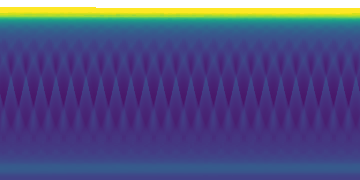

In [7]:
r = httpx.get(
    f"{titiler_endpoint}/bbox/-180,-90,180,90.png",
    params=(
        ("url", zarr_url),
        ("variable", "AIRMASS"),
        # Select 1 specific band
        ("bidx", 50),
        ("rescale", "1,20"),
        ("colormap_name", "viridis"),
    ),
    timeout=10,
)

Image(r.content)

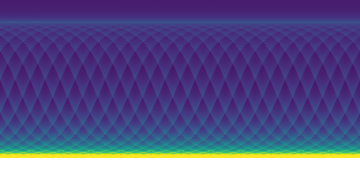

In [8]:
r = httpx.get(
    f"{titiler_endpoint}/bbox/-180,-90,180,90.png",
    params=(
        ("url", zarr_url),
        ("variable", "AIRMASS"),
        # Select 1 specific time slices
        ("sel", "time=2003-06-30"),
        ("rescale", "1,20"),
        ("colormap_name", "viridis"),
    ),
    timeout=10,
)

Image(r.content)

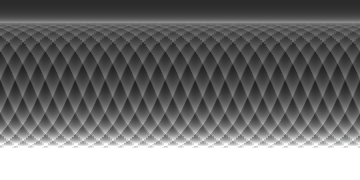

In [9]:
r = httpx.get(
    f"{titiler_endpoint}/bbox/-180,-90,180,90.png",
    params=(
        ("url", zarr_url),
        ("variable", "AIRMASS"),
        # Select 3 specific time slices to create a 3 band image
        ("sel", "time=2003-06-30"),
        ("sel", "time=2004-06-30"),
        ("sel", "time=2005-06-30"),
        ("rescale", "1,10"),
    ),
    timeout=10,
)

Image(r.content)